# Download the Large spaCy Word Vector model

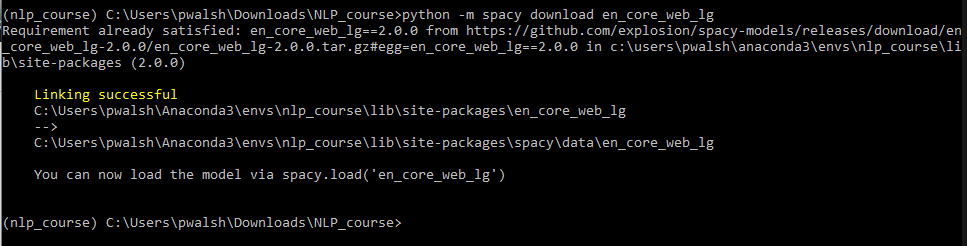

### Run this from an elevated command prompt:
python -m spacy download en_core_web_lg

# Semantics and Word Vectors
Sometimes called "opinion mining", [Wikipedia](https://en.wikipedia.org/wiki/Sentiment_analysis) defines ***sentiment analysis*** as
<div class="alert alert-info" style="margin: 20px">"the use of natural language processing ... to systematically identify, extract, quantify, and study affective states and subjective information.<br>
Generally speaking, sentiment analysis aims to determine the attitude of a speaker, writer, or other subject with respect to some topic or the overall contextual polarity or emotional reaction to a document, interaction, or event."</div>

Up to now we've used the occurrence of specific words and word patterns to perform test classifications. In this section we'll take machine learning even further, and try to extract intended meanings from complex phrases. Some simple examples include:
* Python is relatively easy to learn.
* That was the worst movie I've ever seen.

However, things get harder with phrases like:
* I do not dislike green eggs and ham. (requires negation handling)

The way this is done is through complex machine learning algorithms like [word2vec](https://en.wikipedia.org/wiki/Word2vec). The idea is to create numerical arrays, or *word embeddings* for every word in a large corpus. Each word is assigned its own vector in such a way that words that frequently appear together in the same context are given vectors that are close together. The result is a model that may not know that a "lion" is an animal, but does know that "lion" is closer in context to "cat" than "dandelion".

It is important to note that *building* useful models takes a long time - hours or days to train a large corpus - and that for our purposes it is best to import an existing model rather than take the time to train our own.


___
# Word Vectors
Word vectors - also called *word embeddings* - are mathematical descriptions of individual words such that words that appear frequently together in the language will have similar values. In this way we can mathematically derive *context*. As mentioned above, the word vector for "lion" will be closer in value to "cat" than to "dandelion".

## Vector values
So what does a word vector look like? Since spaCy employs 300 dimensions, word vectors are stored as 300-item arrays.

Note that we would see the same set of values with **en_core_web_md** and **en_core_web_lg**, as both were trained using the [word2vec](https://en.wikipedia.org/wiki/Word2vec) family of algorithms.

In [1]:
import spacy

In [2]:
nlp = spacy.load('en_core_web_lg')

In [3]:
nlp(u'lion').vector

array([ 1.8963e-01, -4.0309e-01,  3.5350e-01, -4.7907e-01, -4.3311e-01,
        2.3857e-01,  2.6962e-01,  6.4332e-02,  3.0767e-01,  1.3712e+00,
       -3.7582e-01, -2.2713e-01, -3.5657e-01, -2.5355e-01,  1.7543e-02,
        3.3962e-01,  7.4723e-02,  5.1226e-01, -3.9759e-01,  5.1333e-03,
       -3.0929e-01,  4.8911e-02, -1.8610e-01, -4.1702e-01, -8.1639e-01,
       -1.6908e-01, -2.6246e-01, -1.5983e-02,  1.2479e-01, -3.7276e-02,
       -5.7125e-01, -1.6296e-01,  1.2376e-01, -5.5464e-02,  1.3244e-01,
        2.7519e-02,  1.2592e-01, -3.2722e-01, -4.9165e-01, -3.5559e-01,
       -3.0630e-01,  6.1185e-02, -1.6932e-01, -6.2405e-02,  6.5763e-01,
       -2.7925e-01, -3.0450e-03, -2.2400e-02, -2.8015e-01, -2.1975e-01,
       -4.3188e-01,  3.9864e-02, -2.2102e-01, -4.2693e-02,  5.2748e-02,
        2.8726e-01,  1.2315e-01, -2.8662e-02,  7.8294e-02,  4.6754e-01,
       -2.4589e-01, -1.1064e-01,  7.2250e-02, -9.4980e-02, -2.7548e-01,
       -5.4097e-01,  1.2823e-01, -8.2408e-02,  3.1035e-01, -6.33

In [4]:
nlp(u'The quick brown fox jumped').vector

array([-2.09217995e-01, -2.78227981e-02, -3.57064009e-02,  1.55218393e-01,
       -1.28050027e-02,  1.31627038e-01, -1.99465990e-01,  4.75811996e-02,
        1.26798794e-01,  1.64792800e+00, -3.57592016e-01, -1.39875397e-01,
       -1.26122087e-02, -2.02728346e-01, -2.25237608e-01,  2.15431936e-02,
        7.78958052e-02,  9.29676056e-01, -2.75549982e-02, -3.71005982e-01,
       -1.42800003e-01, -3.66641544e-02, -1.07376035e-02, -1.84352830e-01,
        2.29006782e-02, -5.17717972e-02, -2.78652012e-01, -1.19738199e-01,
        5.10960072e-03, -2.85990000e-01, -1.58261746e-01,  2.96241999e-01,
        1.09597601e-01, -4.18331996e-02,  1.87256075e-02, -1.03439607e-01,
       -5.10879979e-02, -3.51091917e-03, -6.81461841e-02, -2.05657601e-01,
        1.66347414e-01, -9.31599736e-03, -4.61134054e-02, -1.05457589e-01,
        2.31313989e-01,  1.80005193e-01, -2.06444815e-01, -1.37050152e-02,
        1.70106202e-01, -2.19812002e-02, -2.14003205e-01,  1.07415602e-01,
       -2.80592032e-02, -

In [5]:
# .shape shows the number of dimenions for this vector
nlp(u'The quick brown fox jumped').vector.shape

(300,)

In [6]:
# .shape shows the number of dimenions for this vector
nlp(u'fox').vector.shape

(300,)

Find words with similar vectors

In [7]:
# use .similarity() method to find similar words
tokens = nlp(u'lion cat pet')
for token1 in tokens:
    for token2 in tokens:
        print(token1.text,token2.text,token1.similarity(token2))

lion lion 1.0
lion cat 0.52654374
lion pet 0.39923766
cat lion 0.52654374
cat cat 1.0
cat pet 0.7505456
pet lion 0.39923766
pet cat 0.7505456
pet pet 1.0


Words with a similarity() of 1.0 are perfectly similar, such as when they are the same word.

In [8]:
# even if two words have the opposite meaning, they may have a high
# similarity score if they are often used in the same context. For example:
tokens = nlp(u'like love hate')
for token1 in tokens:
    for token2 in tokens:
        print(token1.text,token2.text,token1.similarity(token2))

like like 1.0
like love 0.65790397
like hate 0.6574652
love like 0.65790397
love love 1.0
love hate 0.6393099
hate like 0.6574652
hate love 0.6393099
hate hate 1.0


In [9]:
# (number of unique words in vocabulary, number of dimensions per vector)
len(nlp.vocab.vectors)

684831

In [10]:
tokens = nlp(u"dog cat nargle")
# token.text, token.has_vector, token.vector_norm, token.is_oov
# (word, has a vector (boolean), sum of squares of all vectors, outside of vocabulary (boolean) 
for token in tokens:
    print(token.text,token.has_vector,token.vector_norm,token.is_oov)

dog True 7.0336733 False
cat True 6.6808186 False
nargle False 0.0 True


When a word is outside of the vocabulary, spaCy doesn't have a vector associated with it and so assigns the word a vector score of 0.0, like in the word 'nargle' above.

## Calculate cosine similarity for word

In [11]:
from scipy import spatial

# returns the cosine similarity
cosine_similarity = lambda vec1,vec2: 1 - spatial.distance.cosine(vec1,vec2)

In [12]:
king = nlp.vocab['king'].vector
man = nlp.vocab['man'].vector
woman = nlp.vocab['woman'].vector

### King - man + woman ----> NEW_VECTOR similar to queen, princess, highness, etc.

In [13]:
new_vector = king - man + woman

In [14]:
computed_similarities = []

# for all words in the entire vocabulary
for word in nlp.vocab:
    if word.has_vector:
        if word.is_lower:
            if word.is_alpha:
                similarity = cosine_similarity(new_vector,word.vector)
                computed_similarities.append((word,similarity))

In [15]:
# key=lambda item:-item[1]   <----display in descending order
computed_similarities = sorted(computed_similarities,key=lambda item:-item[1])

## Show top 10 most similar words
What are the top 10 most similar words to king - man + woman?

In [16]:
print([t[0].text for t in computed_similarities[:10]])

['king', 'queen', 'prince', 'kings', 'princess', 'royal', 'throne', 'queens', 'monarch', 'kingdom']


What's interesting is that Doc and Span objects themselves have vectors, derived from the averages of individual token vectors. <br>This makes it possible to compare similarities between whole documents.